RLC Filter
==========

This example illustrates RLC Filters.


In [ ]:


import math

import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *




We define four low-pass RLC filters with the following factor of
quality: .5, 1, 2 and 4.


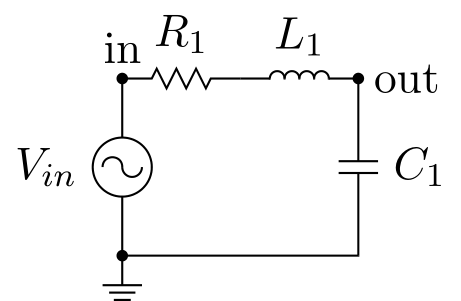

In [ ]:

circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 10@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)



Capacitor C4

We perform an AC analysis.


In [ ]:

simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')



The resonant frequency is given by

$$f_0 = 2 \pi \omega_0 = \frac{1}{2 \pi \sqrt{L C}}$$

and the factor of quality by

$$Q = \frac{1}{R} \sqrt{\frac{L}{C}} = \frac{1}{RC \omega_0}$$


In [ ]:

resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))


Resonant frequency = 1591.5 Hz
Factor of quality = 4.0


We plot the Bode diagram of the four filters.


In [ ]:

figure, axes = plt.subplots(2, figsize=(20, 10))
plt.title("Bode Diagrams of RLC Filters")
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')




/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)
/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() 

We define a pass-band RLC filter with a quality\'s factor of 4.


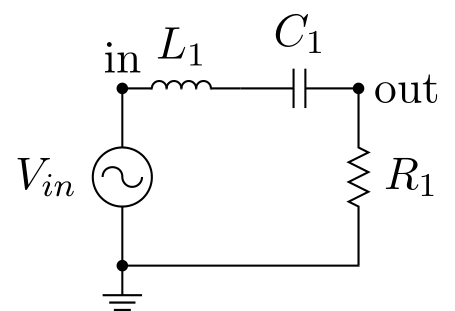

In [ ]:

circuit2 = Circuit('Pass-Band RLC Filter')

circuit2.SinusoidalVoltageSource('input', 'in', circuit2.gnd, amplitude=1@u_V)
circuit2.L(1, 'in', 2, inductance)
circuit2.C(1, 2, 'out', capacitance)
circuit2.R(1, 'out', circuit2.gnd, 25@u_Ω)

simulator2 = circuit2.simulator(temperature=25, nominal_temperature=25)
analysis2 = simulator2.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

bode_diagram(axes=axes,
             frequency=analysis2.frequency,
             gain=20*np.log10(np.absolute(analysis2.out)),
             phase=np.angle(analysis2.out, deg=False),
             marker='.',
             color='magenta',
             linestyle='-',
            )

plt.tight_layout()



/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
/home/fabrice/pyspice-fresh/PySpice/Plot/BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)
